In [109]:
# Import libraries

import pandas as pd
from plotly.subplots import make_subplots
import plotly.graph_objects as go

import plotly.express as px


In [74]:
# Load raw data from scraping

tweets_clean = pd.read_csv('../data/tweets_clean.csv')
tweets_clean.head()

,name,user,date,category,id,content,lang,sourceLabel,inReplyToTweetId,inReplyToUser,mentionedUsers,hashtags,replyCount,retweetCount,likeCount,quoteCount
0,Elon Musk,"{'_type': 'snscrape.modules.twitter.User', 'us...",2022-11-30 17:22:12+00:00,Tech CEO,1.598004e+18,@EvaFoxU @Reuters Exactly. The obvious reality...,en,Twitter for iPhone,1.597924e+18,"{'_type': 'snscrape.modules.twitter.User', 'us...","[{'_type': 'snscrape.modules.twitter.User', 'u...",NaN,2565.0,9638.0,41337.0,1205.0
1,Elon Musk,"{'_type': 'snscrape.modules.twitter.User', 'us...",2022-11-30 15:54:33+00:00,Tech CEO,1.597982e+18,Update from @Neuralink at 6pm PT,en,Twitter for iPhone,NaN,NaN,"[{'_type': 'snscrape.modules.twitter.User', 'u...",NaN,6211.0,6405.0,71890.0,842.0
2,Elon Musk,"{'_type': 'snscrape.modules.twitter.User', 'us...",2022-11-30 09:39:14+00:00,Tech CEO,1.597888e+18,@NorthmanTrader @vincent13031925 Exactly,en,Twitter for iPhone,1.597881e+18,"{'_type': 'snscrape.modules.twitter.User', 'us...","[{'_type': 'snscrape.modules.twitter.User', 'u...",NaN,569.0,257.0,5336.0,25.0
3,Elon Musk,"{'_type': 'snscrape.modules.twitter.User', 'us...",2022-11-30 09:03:04+00:00,Tech CEO,1.597879e+18,@vincent13031925 Trend is concerning. Fed need...,en,Twitter for iPhone,1.597706e+18,"{'_type': 'snscrape.modules.twitter.User', 'us...","[{'_type': 'snscrape.modules.twitter.User', 'u...",NaN,7455.0,10295.0,93386.0,1163.0
4,Elon Musk,"{'_type': 'snscrape.modules.twitter.User', 'us...",2022-11-30 08:40:11+00:00,Tech CEO,1.597873e+18,"@teslaownersSV Much more, but I am simply stat...",en,Twitter for iPhone,1.597871e+18,"{'_type': 'snscrape.modules.twitter.User', 'us...","[{'_type': 'snscrape.modules.twitter.User', 'u...",NaN,646.0,690.0,9893.0,40.0


In [136]:
# Agg Name & Source
source_dict = {'Twitter for iPhone': 'Iphone', 
               'Twitter for iPad': 'iPad',
               'Twitter for Android': 'Android',
               'Twitter for Mac': 'Mac',
               'Twitter Web App': 'Web App',
               'Twitter Media Studio': 'Media Studio',
               'Twitter Media Studio - LiveCut': 'Media Studio',
               'The White House': 'The White House',
               'TweetDeck': 'TweetDeck', 
               'Periscope': 'Periscope',
               'Arrow.': 'Arrow'}

tweets_nns = tweets_clean.replace(source_dict).groupby(['name', 'sourceLabel']).agg({'id': 'count' }).reset_index()
tweets_nns.rename({'sourceLabel': 'Device', 'id': 'Tweets'}, axis=1, inplace=True)
nns_df = tweets_nns.fillna(0)
nns_df

,name,Device,Tweets
0,Alexandria Ocaso-Cortez,Iphone,527
1,Barack Obama,Iphone,151
2,Barack Obama,Media Studio,47
3,Barack Obama,Web App,151
4,Bill Gates,Iphone,2
5,Bill Gates,Media Studio,26
6,Bill Gates,Web App,330
7,Ellen Degeneres,Iphone,28
8,Ellen Degeneres,Media Studio,709
9,Ellen Degeneres,Web App,128


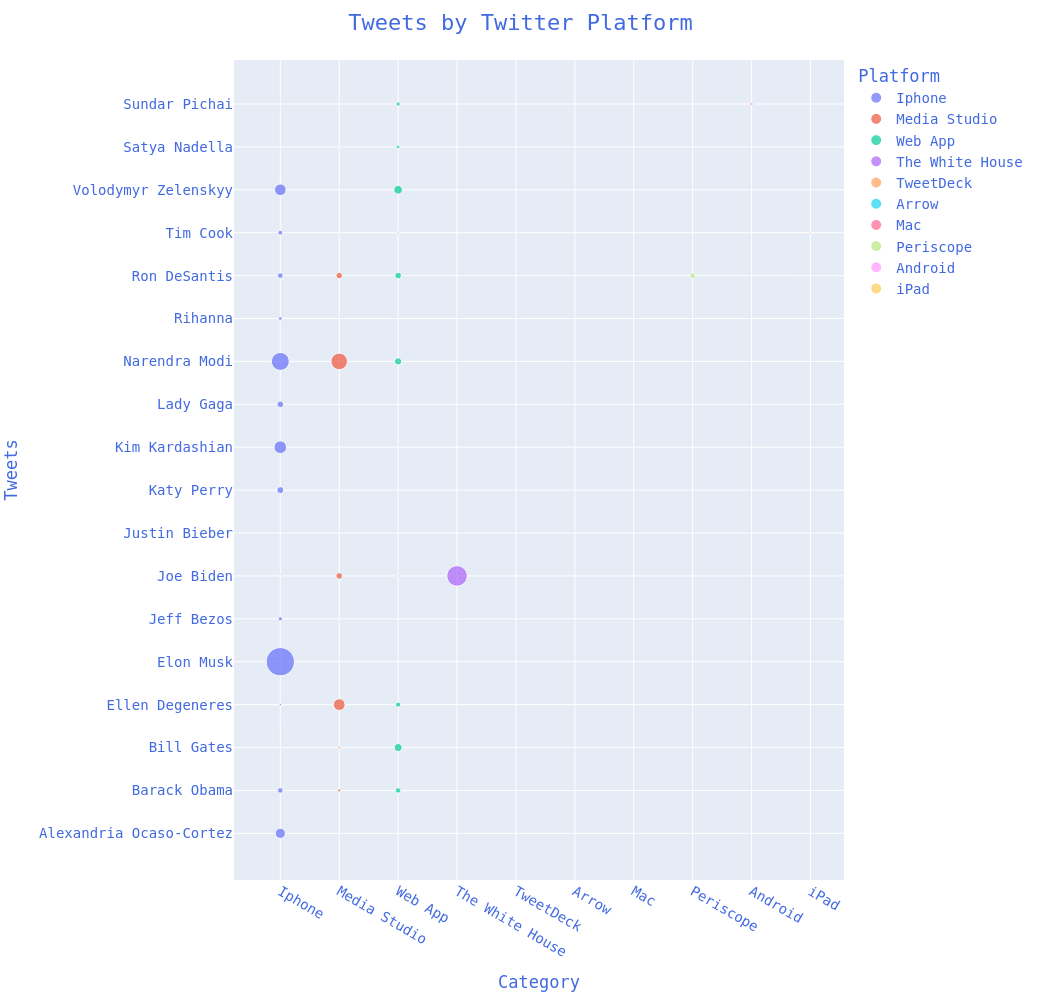

In [146]:
# Bar charts: Device usage


name_platform = px.scatter(nns_df, 
                       x = 'Device',
                       y = 'name', 
                       color = 'Device',
                       custom_data = ['Tweets'],
                           size='Tweets'
                          )

name_platform.update_traces(hovertemplate='<extra></extra>'+
                            '%{x}:  %{customdata[0]}',
                            textfont_size=11,
                                       #title_xaxis="Category",
                              #marker=dict(colors=['gold', 'mediumturquoise',  'lightgreen'], 
                                          #line=dict(color='#000000', width=1))
                             )

name_platform.update_layout(yaxis_title = 'Tweets', 
                         width = 800, height = 1000,
                         title="Tweets by Twitter Platform", 
                         title_font_size = 22,
                         title_x = 0.5,
                         title_xanchor = 'center',
                         xaxis_title="Category",
                         legend_title="Platform",
                         hovermode='y unified',
                         font=dict(family="Comic, monospace",
                                   size=14,
                                   color="RoyalBlue")
                        )

name_platform.show()